##KIDNEY STONE DETECTION USING TRANSFER LEARNING

## Common Dependencies For Convolution Neural Network and Transfer Learning

In [ ]:
!pip install opendatasets pandas
import opendatasets as od
from google.colab import files
uploaded = files.upload()

od.download("https://www.kaggle.com/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/data")

Saving kaggle.json to kaggle (1).json
Skipping, found downloaded files in "./ct-kidney-dataset-normal-cyst-tumor-and-stone" (use force=True to force download)


#### Plot code for loss curves

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
def evaluate(actual, predictions):
  pre = []
  for i in predictions:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(10,10))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
  plt.show()

## Split Dataset code

In [ ]:
!pip install split-folders

In [ ]:
from keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
import keras
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np
from skimage import transform
import splitfolders
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

In [ ]:
splitfolders.ratio(
    "/content/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",
   output="./dataset",
   seed=7,
   ratio=(0.9, 0.1)
)

Copying files: 12446 files [00:11, 1090.32 files/s]


In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_dataset = train_datagen.flow_from_directory('./dataset/train',
                                                  target_size=(200, 200),
                                                  color_mode='rgb',
                                                  class_mode='categorical',
                                                  batch_size=100,
                                                  )

valid_dataset = valid_datagen.flow_from_directory('./dataset/val',
                                                  target_size=(200, 200),
                                                  class_mode='categorical',
                                                  batch_size=100,
                                                  color_mode='rgb',
                                                  shuffle=False
                                                  )

Found 11200 images belonging to 4 classes.
Found 1246 images belonging to 4 classes.


In [ ]:
diseases_labels = []

for key, value in train_dataset.class_indices.items():
   diseases_labels.append(key)

print(diseases_labels)

['Cyst', 'Normal', 'Stone', 'Tumor']


## CNN Method

In [ ]:
model = 0
model = Sequential()

model.add(Conv2D(4, (15, 15), activation='tanh', input_shape=train_dataset.image_shape))
model.add(MaxPool2D(8))
model.add(MaxPool2D(4))
# model.add(MaxPool2D(20))

# model.add(Conv2D(32, (3,3), activation='tanh'))
# model.add(MaxPool2D(2))


# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(MaxPool2D(2))

# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(MaxPool2D(2))


# model.add(Conv2D(128, (3,3), activation='relu'))
# model.add(MaxPool2D(2))

# model.add(Conv2D(128, (3,3), activation='relu'))
# model.add(MaxPool2D(2))


model.add(Flatten())

model.add(Dense(8, activation='tanh'))


model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 186, 186, 4)       2704      
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 4)         0         
 D)                                                              
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 4)           0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 8)                 808       
                                                                 
 dense_1 (Dense)             (None, 4)                 3

In [ ]:
METRICS = [
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')]

model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics = METRICS)

In [ ]:
Info = model.fit(
                 train_dataset,
                 validation_data=valid_dataset,
                 epochs=8)

Epoch 1/8
112/112 [==============================] - 1317s 12s/step - loss: 0.9844 - accuracy: 0.6271 - precision: 0.7603 - recall: 0.4387 - val_loss: 0.8403 - val_accuracy: 0.6862 - val_precision: 0.7654 - val_recall: 0.5682
Epoch 2/8
112/112 [==============================] - 1266s 11s/step - loss: 0.7572 - accuracy: 0.7354 - precision: 0.8036 - recall: 0.6118 - val_loss: 0.6866 - val_accuracy: 0.7721 - val_precision: 0.8352 - val_recall: 0.6429
Epoch 3/8
112/112 [==============================] - 1262s 11s/step - loss: 0.6327 - accuracy: 0.7937 - precision: 0.8492 - recall: 0.6864 - val_loss: 0.5957 - val_accuracy: 0.8138 - val_precision: 0.8687 - val_recall: 0.7327
Epoch 4/8
112/112 [==============================] - 1256s 11s/step - loss: 0.5428 - accuracy: 0.8282 - precision: 0.8725 - recall: 0.7567 - val_loss: 0.5150 - val_accuracy: 0.8363 - val_precision: 0.8844 - val_recall: 0.7673
Epoch 5/8
112/112 [==============================] - 1257s 11s/step - loss: 0.4698 - accuracy: 0

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(Info.history[met])
    ax[i].plot(Info.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
predictions = model.predict(valid_dataset)

In [ ]:
# diseases_labels = []

# for key, value in train_dataset.class_indices.items():
#    diseases_labels.append(key)

In [ ]:
def evaluate(actual, predictions):
  pre = []
  for i in predictions:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(10,10))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
  plt.show()

In [ ]:
evaluate(valid_dataset.classes,predictions)

In [ ]:
model.evaluate(valid_dataset)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Path to the image file
image_path = '//content/dataset/train/Stone/Stone- (396).jpg'

# Load and display the image
img = mpimg.imread(image_path)
print("Original image shape/size: ", img.shape)
plt.imshow(img)  # Assuming the image is grayscale
plt.axis('off')  # Turn off axis labels
plt.show()

def classify_image(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(200, 200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    preds = model.predict(x)
    pred = np.argmax(preds)
    print("prediction Output = ",pred)
    print("Predicted as: ", diseases_labels[pred])

# Example usage
classify_image(image_path)


In [ ]:
diseases_labels

## Transfer Learning Method

### Inception V3 Model

In [ ]:
import numpy as np
import pandas as pd
import os
import shutil
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from keras import applications
from keras import Sequential, layers
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.optimizers import Adam
import tensorflow_hub as hub
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from keras.applications.inception_v3 import InceptionV3

# create the base pre-trained model
base_model = InceptionV3(include_top=False)
base_model.trainable = False
inputs = layers.Input(shape=( 200, 200, 3), name="input_layer")
x = base_model(inputs)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
# x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(8, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation="softmax", name="output_layer")(x)
inception = keras.Model(inputs, outputs)

inception.summary()

inception.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-4),
                metrics = ['accuracy'])
inception_history = inception.fit(train_dataset,
                            steps_per_epoch = len(train_dataset),
                            epochs = 10,
                            validation_data = valid_dataset,
                            validation_steps = len(valid_dataset))

87910968/87910968 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 200, 200, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_average_pooling_lay  (None, 2048)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 32)                8224   

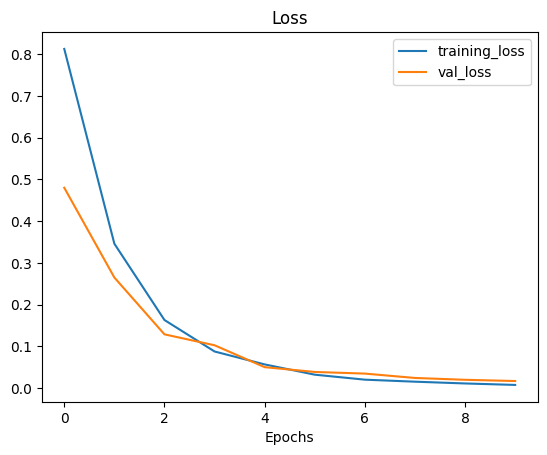

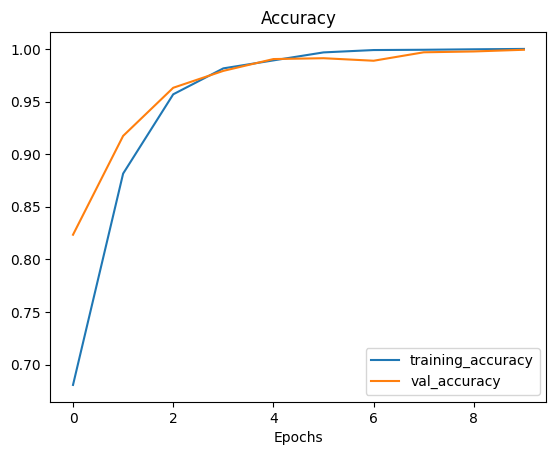

In [ ]:
plot_loss_curves(inception_history)

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_15 False
42 batch_normalization_15 False

In [ ]:
# Make all the layers in model_2_base_model trainable
base_model.trainable = True

# Freeze all layers except for the last 'n' layers
for layer in base_model.layers[:-61]:
  layer.trainable = False

inception.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-5),
                metrics = ['accuracy'])

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

print(len(inception.trainable_variables))

0 input_1 False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_15 False
42 batch_normalization_15 False

In [ ]:
inception.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-5),
                metrics = ['accuracy'])
inception_history = inception.fit(train_dataset,
                            steps_per_epoch = len(train_dataset),
                            epochs = 20,
                            validation_data = valid_dataset,
                            initial_epoch = inception_history.epoch[-1],
                            validation_steps = len(valid_dataset))

Epoch 10/20
112/112 [==============================] - 70s 509ms/step - loss: 0.1390 - accuracy: 0.9581 - val_loss: 0.0264 - val_accuracy: 0.9904
Epoch 11/20
112/112 [==============================] - 55s 491ms/step - loss: 0.0116 - accuracy: 0.9996 - val_loss: 0.0088 - val_accuracy: 0.9992
Epoch 12/20
112/112 [==============================] - 55s 491ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 13/20
112/112 [==============================] - 55s 493ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 14/20
112/112 [==============================] - 55s 487ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 0.9992
Epoch 15/20
112/112 [==============================] - 56s 497ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 0.9992
Epoch 16/20
112/112 [==============================] - 56s 501ms/step - loss: 9.5999e-04 - accuracy: 1.0000 - val_loss: 0.00

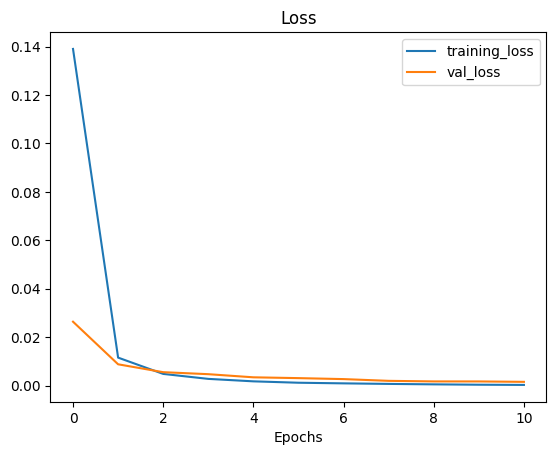

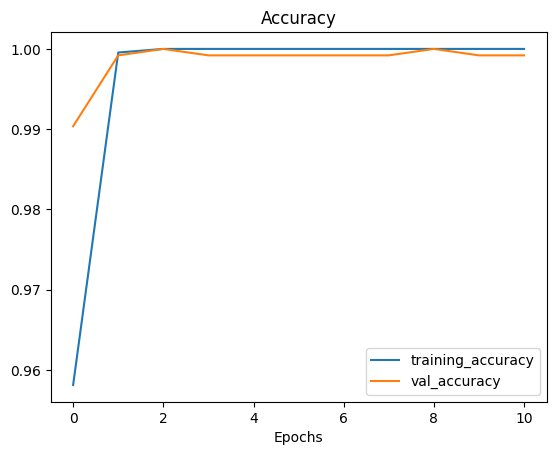

In [ ]:
plot_loss_curves(inception_history)

In [ ]:
predictions_inception = inception.predict(valid_dataset)

13/13 [==============================] - 7s 456ms/step


In [ ]:
evaluate(valid_dataset.classes, predictions_inception)
  import tensorflow as tf

def specificity(y_true, y_pred):
    true_negatives = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 0), tf.equal(y_pred, 0)), tf.float32))
    actual_negatives = tf.reduce_sum(tf.cast(tf.equal(y_true, 0), tf.float32))
    return true_negatives / (actual_negatives + tf.keras.backend.epsilon())

def sensitivity(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 1), tf.equal(y_pred, 1)), tf.float32))
    actual_positives = tf.reduce_sum(tf.cast(tf.equal(y_true, 1), tf.float32))
    return true_positives / (actual_positives + tf.keras.backend.epsilon())
 # Assuming y_true and y_pred are your true labels and predicted labels
spec = specificity(valid_dataset.classes, predictions_inception)
sens = sensitivity(valid_dataset.classes, predictions_inception)
print("Specificity:", spec.numpy())
print("Sensitivity:", sens.numpy())

NameError: name 'predictions_inception' is not defined

## For displaying a single Image

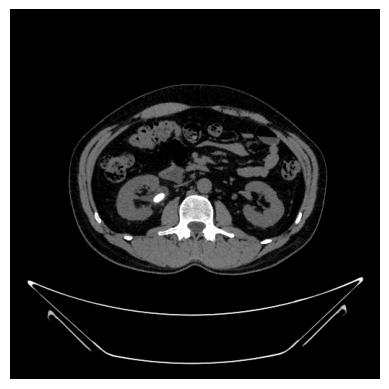

image shape: (512, 512, 3)
image dtype: uint8


In [ ]:
# Path to the image file
image_path = "/content/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/Stone- (10).jpg"
label = 0

# Load and display the image
image = mpimg.imread(image_path)
plt.imshow(image)  # Assuming the image is grayscale
plt.axis('off')  # Turn off axis labels
plt.show()
print("image shape:", image.shape)
print("image dtype:", image.dtype)

#For Display Random images

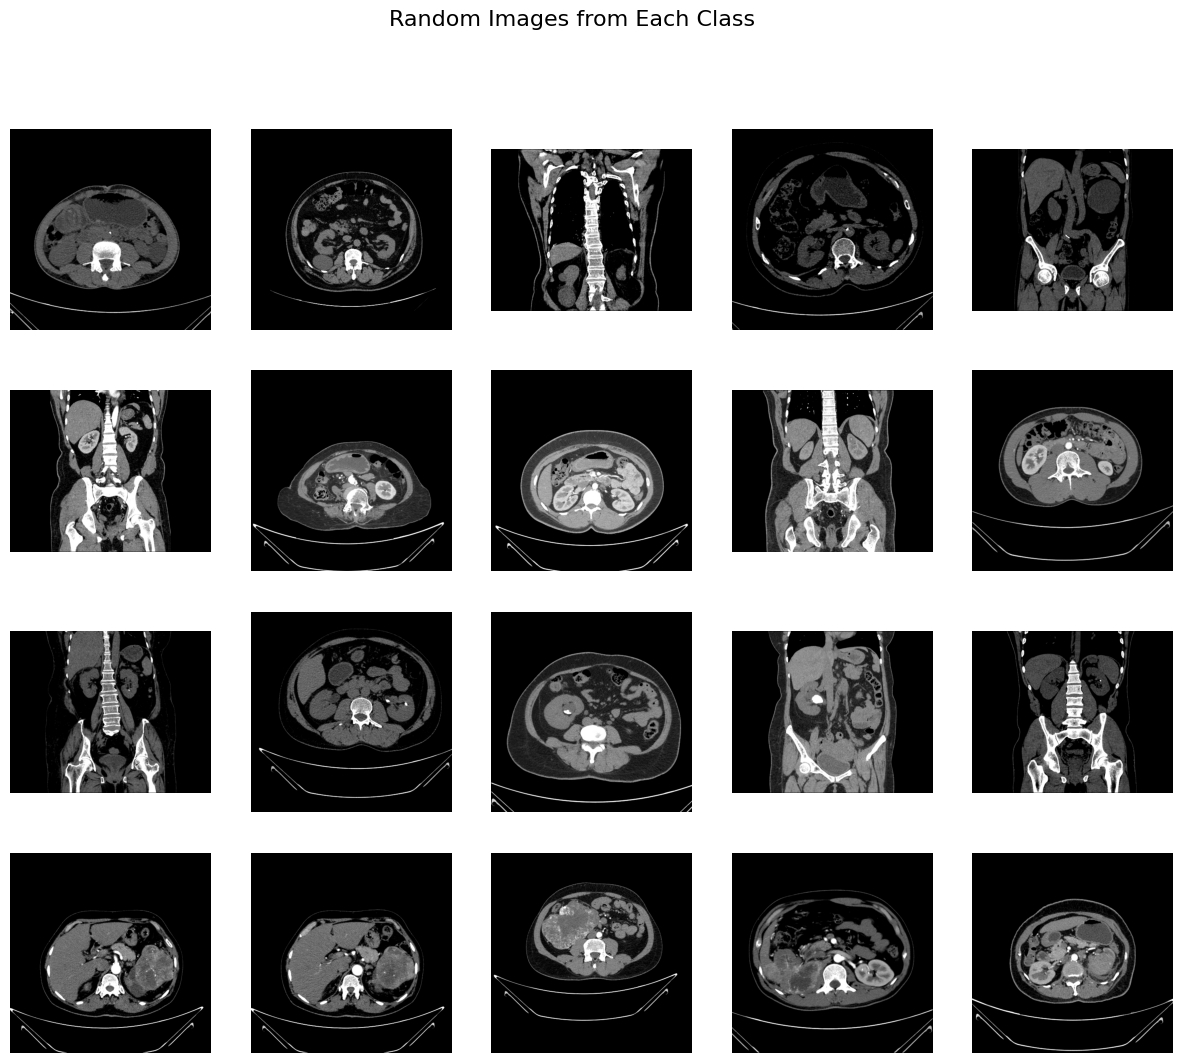

In [ ]:
import random
main_directory = "/content/dataset/train"

# List of classes
classes = ['Cyst', 'Normal', 'Stone', 'Tumor']

# Create a 4x5 grid
fig, axs = plt.subplots(4, 5, figsize=(15, 12))
fig.suptitle('Random Images from Each Class', fontsize=16)

# Iterate over each class
for i, class_name in enumerate(classes):
    class_directory = os.path.join(main_directory, class_name)
    image_files = os.listdir(class_directory)
    random_images = random.sample(image_files, 5)  # Get 5 random images

    # Display each random image
    for j, image_file in enumerate(random_images):
        image_path = os.path.join(class_directory, image_file)
        image = mpimg.imread(image_path)
        axs[i, j].imshow(image, cmap='gray')  # Assuming the images are grayscale
        axs[i, j].axis('off')

plt.show()

#Image Detection Result

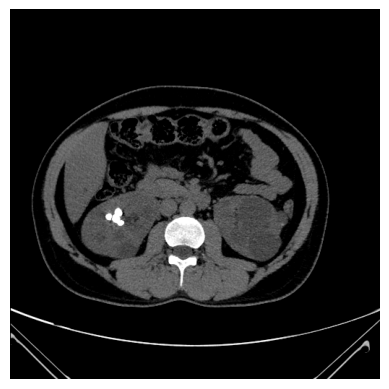

1/1 [==============================] - 0s 18ms/step
prediction Output =  0
Predicted as:  Cyst


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Path to the image file
image_path = '//content/dataset/train/Cyst/Cyst- (1155).jpg'

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)  # Assuming the image is grayscale
plt.axis('off')  # Turn off axis labels
plt.show()

def classify_image(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(200, 200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    preds = model.predict(x)
    pred = np.argmax(preds)
    print("prediction Output = ",pred)
    print("Predicted as: ", diseases_labels[pred])

# Example usage
classify_image(image_path)

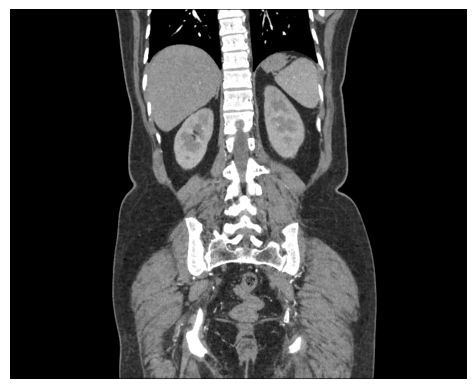

1/1 [==============================] - 0s 17ms/step
prediction Output =  1
Predicted as:  Normal


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Path to the image file
image_path = '//content/dataset/train/Normal/Normal- (1723).jpg'

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)  # Assuming the image is grayscale
plt.axis('off')  # Turn off axis labels
plt.show()

def classify_image(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(200, 200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    preds = model.predict(x)
    pred = np.argmax(preds)
    print("prediction Output = ",pred)
    print("Predicted as: ", diseases_labels[pred])

# Example usage
classify_image(image_path)

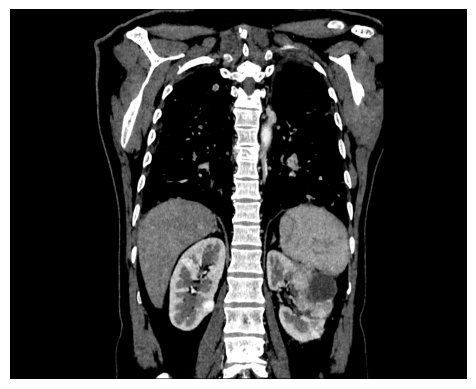

1/1 [==============================] - 0s 27ms/step
prediction Output =  3
Predicted as:  Tumor


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Path to the image file
image_path = '//content/dataset/val/Tumor/Tumor- (1251).jpg'

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)  # Assuming the image is grayscale
plt.axis('off')  # Turn off axis labels
plt.show()

def classify_image(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(200, 200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    preds = model.predict(x)
    pred = np.argmax(preds)
    print("prediction Output = ",pred)
    print("Predicted as: ", diseases_labels[pred])

# Example usage
classify_image(image_path)

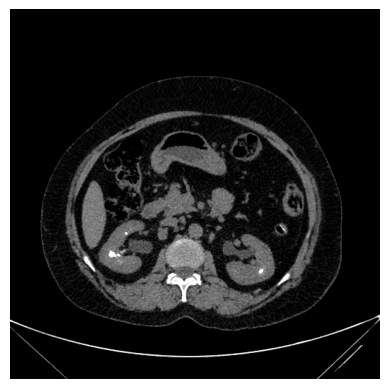

1/1 [==============================] - 0s 51ms/step
prediction Output =  2
Predicted as:  Stone


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Path to the image file
image_path = '//content/dataset/train/Stone/Stone- (396).jpg'

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)  # Assuming the image is grayscale
plt.axis('off')  # Turn off axis labels
plt.show()

def classify_image(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(200, 200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    preds = model.predict(x)
    pred = np.argmax(preds)
    print("prediction Output = ",pred)
    print("Predicted as: ", diseases_labels[pred])

# Example usage
classify_image(image_path)